In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2

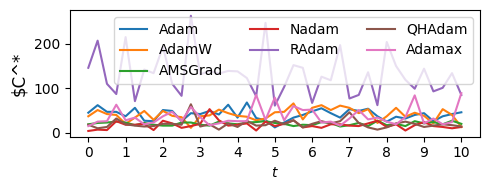

In [40]:

from qoop.core import optimizer_pennylane
import pennylane as qml
optimizers = [qml.AdamOptimizer, 
             optimizer_pennylane.AdamWOptimizer,
             optimizer_pennylane.AMSGradOptimizer,
             optimizer_pennylane.NadamOptimizer,
             optimizer_pennylane.RAdamOptimizer,
             optimizer_pennylane.QHAdamOptimizer,
             optimizer_pennylane.AdamaxOptimizer]

fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ts = np.linspace(0, 10, 41)
# VQE
for j, optimizer in enumerate(optimizers):
    
    indices = []
    for i, t in enumerate(ts):
        # Load data
        loss = np.loadtxt(f'../data/loss/lossdynamic_3qubit_2layer_{optimizer.__name__}_t{float(t)}.txt')
        index = np.where(loss < 10**(-3))[0]
        if len(index) > 0:
            index = index[0]
        else:
            index = 400
        indices.append(index)
    ax.plot(ts, indices, label = optimizer.__name__[:-9])

# ax.set_ylim(-0.1, 1.1)
ax.set_xticks(list(range(0, 11)))
ax.set_xticklabels(list(range(0, 11)))
ax.set_ylabel(r"$C^*", fontsize = 12)
ax.set_xlabel(r"$t$")

ax.legend(ncol = 3)
# plt.legend(ncol = 5)
#plt.tight_layout()
plt.tight_layout()
plt.savefig('../data/images/dynamic_variant2.svg', bbox_inches='tight')
plt.show()